<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/4_Aprendizaje_no_supervisado/3_Taller_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# **Taller: Análisis de Componentes Principales - PCA**

**IMPORTANTE**: Guarda una copia de este notebook en tu Google Drive o computador.

**Taller en parejas**

**Nombres estudiantes:**

- José Palacios

**Forma de entrega**

Jupyter Notebook publicado en su cuenta de Github con el nombre “Taller_PCA_apellidos_estudiantes.ipynb”.

**Plazo de entrega**

Hoy, 21 de octubre, máximo a las 11:59 p.m., debes enviar link del notebook al correo lina.castro6@uexternado.edu.co, de lo contrario, no será tenido en cuenta.

**Instrucciones Generales**

Completa el código en las celdas marcadas con `### TU CÓDIGO AQUÍ ###`. Puedes añadir más celdas si lo requieres.

**Caso de Estudio: Consultoría para "Inversiones Inmobiliarias S.A."** 🏢

**El Escenario:**

Acaban de ser contratados como analistas de datos en **"Inversiones Inmobiliarias S.A."**, una firma líder en el sector de bienes raíces en la región. La firma está buscando expandir sus operaciones, pero se enfrenta a un desafío común: el mercado inmobiliario es complejo y está influenciado por una multitud de factores.

**El Problema:**

El equipo de valoración de propiedades actualmente utiliza modelos basados principalmente en metros cuadrados y número de habitaciones. Sin embargo, saben que factores como la **ubicación** (proximidad a parques, hospitales, transporte), la **seguridad** (tasa de criminalidad) y las **características intrínsecas** de la propiedad (baños, tamaño) interactúan de formas complejas. Tienen muchos datos (`houses.csv`), pero les cuesta extraer una visión clara y concisa de qué define realmente el "atractivo" de una propiedad más allá de lo obvio. Comparar propiedades con perfiles multidimensionales diferentes es difícil y propenso a errores.

**Su Misión (como consultores):**

La dirección les ha encargado aplicar técnicas avanzadas de *machine learning* para abordar este problema. Específicamente, quieren que utilicen el **Análisis de Componentes Principales (PCA)** para:

1.  **Reducir la Complejidad:** Tomar las múltiples características de las propiedades y destilarlas en un número menor de "factores" o "índices" clave que capturen la esencia de lo que impulsa el valor.
2.  **Crear Índices Interpretables:** No basta con reducir dimensiones; deben poder explicar qué significan estos nuevos índices en términos de negocio (ej. "Índice de Tamaño y Comodidades", "Índice de Calidad de Ubicación").

**Su Entregable:**

Deberán completar este Jupyter Notebook, realizando el análisis de PCA sobre el dataset `houses.csv`, interpretando los componentes principales y creando las visualizaciones solicitadas. Sus conclusiones serán presentadas al comité de inversiones para ayudarles a tomar decisiones más informadas.

# 1. Importa las librerías necesarias

In [4]:
### TU CÓDIGO AQUÍ ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


### Mejorar visualización de dataframes y gráficos

In [5]:
# Que muestre todas las columnas
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Configuraciones para una mejor visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 2 Carga el dataset "houses.csv" que se encuentra en el repositorio del curso, carpeta "datasets" y muestra las primeras 5 filas.

In [8]:
### TU CÓDIGO AQUÍ ###
df = pd.read_csv("houses.csv")

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3. Análisis Exploratorio y Preprocesamiento de Datos

PCA impone dos condiciones clave:
1.  **SSolo puede aplicarse a variables numéricas..**
2.  **Es muy sensible a las escalas de las variables.**

En consecuencia, en esta sección debemos: elegir las variables pertinentes, llevarlas a formato numérico y estandarizarlas..

## 3.1. Revisa si hay valores nulos y muestra el tipo de dato de cada una de las columnas

In [10]:
### TU CÓDIGO AQUÍ ###
df.info()
# No hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1000 non-null   int64 
 1   Region               1000 non-null   object
 2   Bedrooms             1000 non-null   int64 
 3   Bathrooms            1000 non-null   int64 
 4   Square_Meters        1000 non-null   int64 
 5   Dist_to_Park         1000 non-null   int64 
 6   Dist_to_Hospital     1000 non-null   int64 
 7   Dist_to_Underground  1000 non-null   int64 
 8   Dist_to_School       1000 non-null   int64 
 9   Crime_Rate           1000 non-null   object
 10  Price                1000 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 86.1+ KB


## 3.2. Codifica las Variables Categóricas Region y Crime_Rate

* **Region:** Es una variable nominal (no hay un orden inherente). Por tanto, usa **One-Hot Encoding**. Incluye en el código drop_first=True y dtype=int.
* **Crime_Rate:** Es una variable ordinal (Low < Medium < High). Por tanto, dale un valor numérico según este diccionario: mapping = {'High': 3, 'Medium': 2, 'Low': 1}

In [11]:
### TU CÓDIGO AQUÍ ###
df = pd.get_dummies(df, columns=['Region'], drop_first=True, dtype=int)

mapping = {'High': 3, 'Medium': 2, 'Low': 1}
df['Crime_Rate'] = df['Crime_Rate'].map(mapping).astype(int)

## 3.3. Selección y Estandarización de Variables

Ahora vamos a tomar todas las variables explicativas (features) y aplicaremos una estandarización. Esto significa ajustar cada una para que tenga media 0 y desviación estándar 1. Es un paso indispensable: si no lo hacemos, la variable con mayor escala (como Square_Meters) acapararía el PCA, porque este método maximiza la varianza y, por tanto, daría más peso a magnitudes grandes solo por su escala.

In [12]:
# Seleccionamos las columnas que usaremos para PCA
# Excluimos el ID, las categóricas originales y el precio (nuestra variable respuesta)
features = ['Bedrooms', 'Bathrooms', 'Square_Meters', 'Dist_to_Park',
            'Dist_to_Hospital', 'Dist_to_Underground', 'Dist_to_School',
            'Crime_Rate', 'Region_North', 'Region_South', 'Region_West']

X = df[features]
y = df['Price']

In [13]:
# Estandarizamos las características
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)

In [14]:
# Convertimos a DataFrame para facilidad de uso posterior
X_scaled_df = pd.DataFrame(X_scaled, columns=[features])
X_scaled_df

,Bedrooms,Bathrooms,Square_Meters,Dist_to_Park,Dist_to_Hospital,Dist_to_Underground,Dist_to_School,Crime_Rate,Region_North,Region_South,Region_West
0,-2.14,-2.08,-1.69,-0.42,0.97,-1.14,-0.49,1.21,-0.38,1.21,-0.74
1,-1.09,-1.42,-1.40,-0.32,-1.30,-1.19,-1.45,1.21,-0.38,-0.83,-0.74
2,-1.62,-1.42,-1.24,2.10,-0.24,0.87,-1.29,-0.02,2.65,-0.83,-0.74
3,0.49,0.57,0.67,-1.10,-0.89,-1.19,-0.10,-1.25,-0.38,-0.83,1.35
4,1.01,1.24,0.84,1.63,-1.39,1.59,-1.23,-0.02,-0.38,-0.83,1.35
...,...,...,...,...,...,...,...,...,...,...,...
995,-1.09,-0.09,-0.70,0.38,-0.88,-1.05,0.11,-0.02,-0.38,-0.83,-0.74
996,1.01,1.24,1.30,-0.04,0.07,1.42,0.98,-0.02,-0.38,-0.83,1.35
997,0.49,-0.09,0.18,0.29,0.08,-0.53,-1.60,1.21,-0.38,-0.83,1.35
998,-1.62,-1.42,-1.62,-0.07,1.25,0.64,0.82,-0.02,-0.38,1.21,-0.74


Estandariza las variables que se encuentran en X. Llama al nuevo objeto X_scaled.

In [15]:
### TU CÓDIGO AQUÍ ###

print('Dimensiones de los datos estandarizados:', X_scaled.shape)

Dimensiones de los datos estandarizados: (1000, 11)


## 3.4. Grafica un mapa de calor para ver las correlaciones entre las variables predictoras (features).

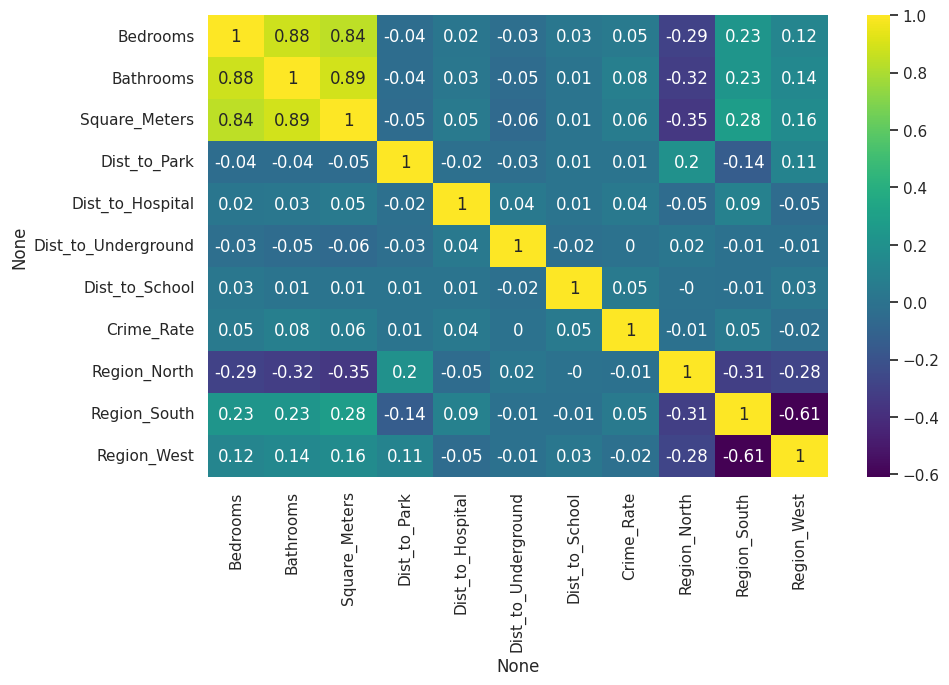

In [16]:
### TU CÓDIGO AQUÍ ###
corr = X_scaled_df.corr().round(2)
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

## 3.5. Escribe un análisis sobre las correlaciones observadas. Haz énfasis en las correlaciones más altas (positivas o negativas).

**Cargas altas y positivas**: Bedrooms, Bathrooms y Square_Meters entre ellas tienen correlaciones altas.

**Cargas altas y negativas**: Region_South y Region_West tienen correlaciones negativas altas.

## Análisis:
Al observar el mapa de calor, parece razonable que habitaciones, baños y metros cuadrados estén vinculados: una vivienda más grande puede albergar más cuartos y baños. Además, si aumentan los cuartos —pensando en más ocupantes— también tiene sentido que haya más baños para atender a un mayor número de residentes.

# 4. Aplicando el Análisis de Componentes Principales (PCA)

Con los datos limpios y estandarizados, es hora de aplicar PCA. Nuestro objetivo es determinar cuántos componentes principales necesitamos para capturar una cantidad significativa de la "información" (varianza) de nuestros datos originales.

## 4.1. Instancia PCA. No especifiques n_components para calcularlos todos. Ajusta PCA a los datos escalados.

In [17]:
### TU CÓDIGO AQUÍ ###
X_scaled_dff =PCA()
X_scaled_dff.fit(X_scaled_df)

PCA()

## 4.2. Varianza Explicada

El aspecto más importante de PCA es la **varianza explicada**. Cada componente principal explica un porcentaje de la varianza total de los datos. El primer componente siempre explica la mayor parte, el segundo un poco menos, y así sucesivamente.

Grafica la varianza explicada acumulada para decidir cuántos componentes son suficientes.

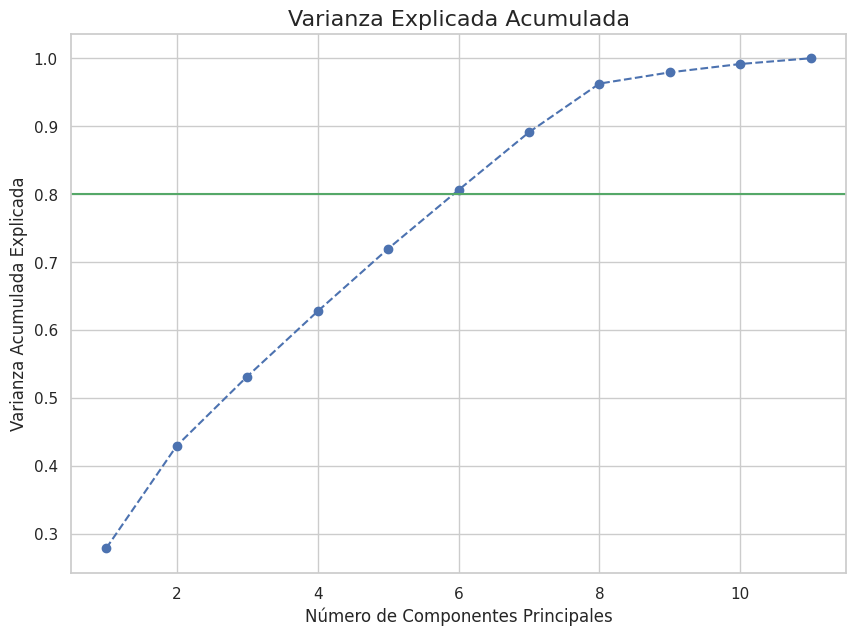

In [18]:
### TU CÓDIGO AQUÍ ###
varianza_acumulada_df = np.cumsum(X_scaled_dff.explained_variance_ratio_)

plt.figure(figsize=(10, 7))
plt.plot(range(1, len(varianza_acumulada_df) + 1), varianza_acumulada_df, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada', fontsize=16)
plt.xlabel('Número de Componentes Principales', fontsize=12)
plt.ylabel('Varianza Acumulada Explicada', fontsize=12)
plt.axhline(y=0.8, color='g', linestyle='-', label='80% de Varianza')
plt.show()

Este gráfico funciona como criterio de elección: visualiza el equilibrio entre simplicidad y cantidad de información.**.
- Si buscamos el modelo más sencillo, podríamos quedarnos con 2 o 3 componentes, pero solo captaríamos ~40–50% de la variabilidad (se perdería bastante información).
- En la práctica profesional, suele retenerse el número de componentes necesario para explicar entre 90% y 95% de la varianza.

## 4.3. ¿Con cuántos componentes se captura el 90% de la información contenida en nuestras 11 variables originales?

RTA: Con 8 componentes

# 5. Re-aplicando PCA indicando el Número de Componentes Deseados

Corre PCA de nuevo, pero esta vez especificando que queremos quedarnos con 4 componentes.

In [19]:
### TU CÓDIGO AQUÍ ###
ComponentesPCA=PCA(n_components=4)
ComponentesPCA.fit(X_scaled_df)

PCA(n_components=4)

Hemos reducido las dimensiones, pero ¿qué significan estas nuevas 4 variables? Para un economista, esta es la parte más importante. Debemos "bautizar" a nuestros componentes entendiendo qué variables originales los componen.

Esto lo hacemos analizando los **loadings** (cargas o pesos) de cada variable original en cada componente.

## 5.1. Grafica el mapa de calor de los loadings

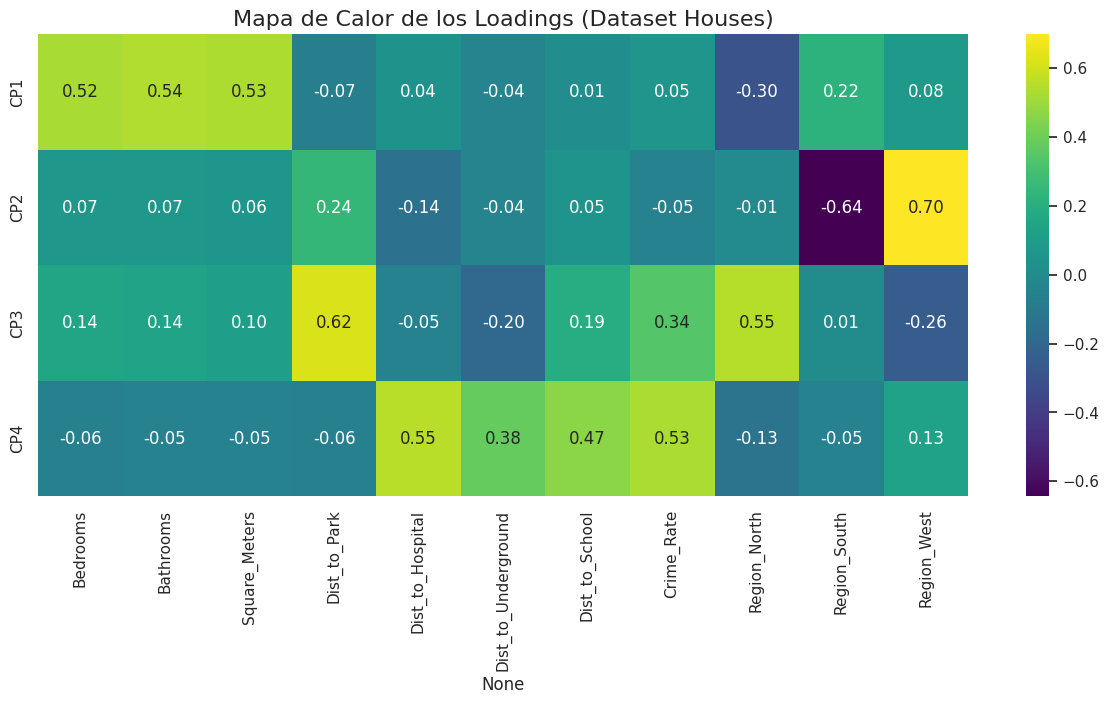

In [26]:
df_huuse_loadings = pd.DataFrame(ComponentesPCA.components_,
                                columns=X_scaled_df.columns,
                                index=[f'CP{i+1}' for i in range(ComponentesPCA.n_components_)])
df_huuse_loadings

plt.figure(figsize=(15, 6))
sns.heatmap(df_huuse_loadings, annot=True, cmap='viridis', fmt='.2f') # Used the correct DataFrame
plt.title('Mapa de Calor de los Loadings (Dataset Houses)', fontsize=16) # Updated title
plt.show()

## 5.2. Realiza una interpretación de los componentes. ¿Cuáles variables tienen las cargas altas y positivas y cuáles las cargas altas y negativas? De acuerdo con este análisis, ¿qué nombre le darías a cada componente?

## Interpretación
Cargas altas y positivas:
> CP1: Bedrooms,        Bathrooms,      Square_Meters

> CP2: Region_West

> CP3: Dist_to_Park,Region_North

> CP4:Dist_to_Hospital, Crime_Rate

Cargas altas y negativas:
> CP1: Region_North

> CP2: Region_South'

> CP3: Dist_to_Underground, Region_West

> CP4:no hay presencia de  cargas altas negativas.

## Nombre de componentes
> CP1: **Tamaño y Comodidades residenciales**

> CP2: **favorecimineto de vivienda en el oeste**

> CP3: **Proximidad a Parque y Región Norte**

> CP4: **atención hospitalaria e inseguridad**